In [28]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import scipy.stats

from Configuration import Configuration
from NeuralTract import NeuralTract

In [29]:
conf = Configuration('confNeuralTractSpikes.rmto')

In [30]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [31]:
pools = []
pools.append(NeuralTract(conf, 'CM_ext'))

tic = time.clock()
for i in xrange(0,len(t)-1):
    pools[0].atualizePool(t[i])
toc = time.clock()
print str(toc - tic) + ' seconds'

Descending Command CM_ext built
81.544504 seconds


In [32]:
pools[0].listSpikes()

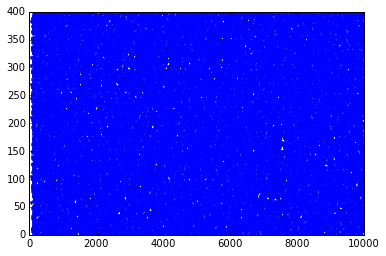

In [33]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1]+1, '.')

In [34]:
ISI = np.array([])
for i in xrange(0,len(pools[0].unit)):
    ISI = np.append(ISI, np.diff(np.reshape(np.array(pools[0].unit[i].terminalSpikeTrain), (-1,2))[:,0]))
    

(array([  7.73000000e+02,   5.56600000e+03,   9.61800000e+03,
          6.91600000e+03,   3.16700000e+03,   1.07600000e+03,
          2.51000000e+02,   6.00000000e+01,   7.00000000e+00,
          2.00000000e+00]),
 array([  31.6,   70. ,  108.4,  146.8,  185.2,  223.6,  262. ,  300.4,
         338.8,  377.2,  415.6]),
 <a list of 10 Patch objects>)

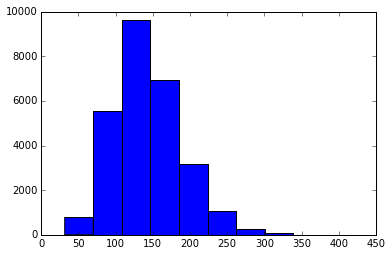

In [35]:
plt.figure()
plt.hist(ISI)

In [36]:
SD = np.std(ISI)
M = np.mean(ISI)
SK = scipy.stats.skew(ISI)
CV = SD / M

print 'ISI Mean = ' + str(M)
print 'ISI Standard deviation = ' + str(SD)
print 'ISI Skewness = ' + str(SK)
print 'ISI CV = ' + str(CV)

ISI Mean = 142.558743986
ISI Standard deviation = 44.8290576542
ISI Skewness = 0.632376996764
ISI CV = 0.314460245656


In [37]:
M_FR = 1000.0 / M
SD_FR = np.sqrt((SD**2) * 1000 / (M**3) + 1/6.0 + (SD**4) / (2*M**4) - SK/(3*M**3))


print 'Firing rate mean = ' + str(M_FR)
print 'Firing rate standard deviation = ' + str(SD_FR)

Firing rate mean = 7.01465214998
Firing rate standard deviation = 0.930161998794


In [40]:
CV_FR = SD_FR / M_FR
print 'CV of Firing rate = ' + str(CV_FR)

CV of Firing rate = 0.132602726252
